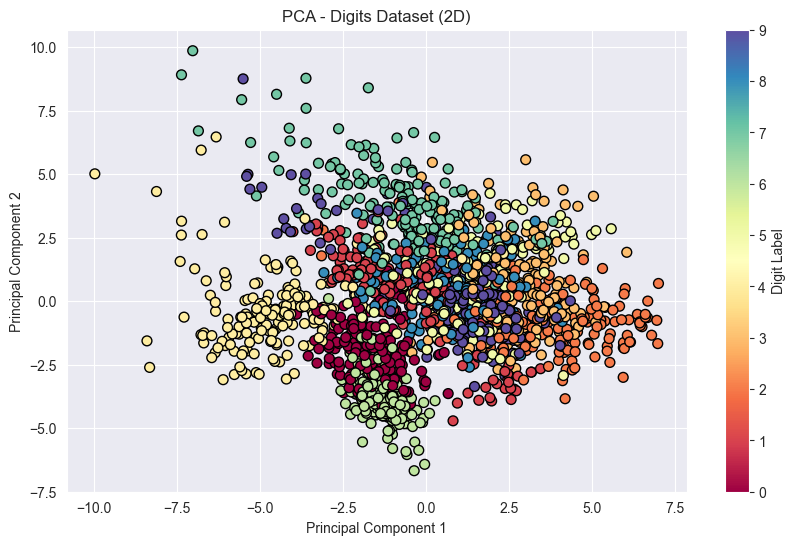

Składowe główne (macierz wektorów własnych):
[[-0.          0.18223392  0.285868    0.22036967 -0.02516956 -0.00949725
  -0.0524765  -0.06269499  0.03470727  0.24553368  0.22915174 -0.10794381
   0.03620209  0.03871159 -0.08378077 -0.09277502  0.01669934  0.1367165
  -0.06305075 -0.12287927  0.14819348 -0.02348425 -0.1711997  -0.10420837
  -0.00394882 -0.1163897  -0.18820473  0.0658604   0.14353257 -0.12820705
  -0.18062075 -0.05270917 -0.         -0.23890251 -0.23500613 -0.00509137
  -0.01310881 -0.15911618 -0.12939416 -0.         -0.05559906 -0.18715707
  -0.15353371 -0.04682572 -0.11089272 -0.10720947  0.01792652 -0.00227271
  -0.02881729  0.040868    0.11027068  0.0318244  -0.07904945  0.06832147
   0.12124707  0.04877119 -0.00183586  0.16039569  0.27985301  0.19444929
   0.01777381  0.103198    0.1198106   0.07149362]
 [ 0.          0.04702701  0.0595648  -0.02080385  0.15590316  0.27413299
   0.24973251  0.14583207 -0.00102721  0.02761909  0.01450474 -0.09225537
   0.0572917   0.

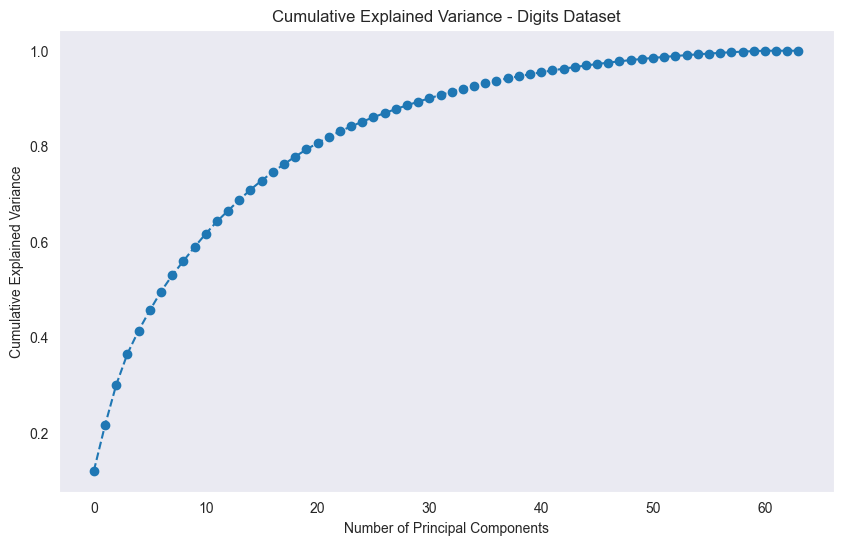

Liczba składowych potrzebnych do wyjaśnienia 95% wariancji: 40
Liczba składowych potrzebnych do wyjaśnienia 99% wariancji: 54


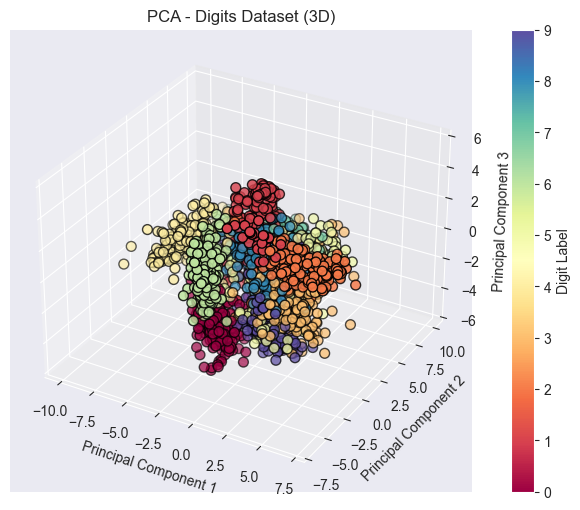

Wariancja wyjaśniana przez PC1: 0.12
Wariancja wyjaśniana przez PC2: 0.10
Wariancja wyjaśniana przez PC3: 0.08
Łączna wariancja wyjaśniana przez trzy składowe: 0.30


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits

digits = load_digits()
X = digits.data
y = digits.target

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='Spectral', edgecolor='k', s=50)
plt.title("PCA - Digits Dataset (2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(scatter, label="Digit Label")
plt.show()

print("Składowe główne (macierz wektorów własnych):")
print(pca.components_)

explained_variance = pca.explained_variance_ratio_
print(f"Wariancja wyjaśniana przez PC1: {explained_variance[0]:.2f}")
print(f"Wariancja wyjaśniana przez PC2: {explained_variance[1]:.2f}")
print(f"Łączna wariancja wyjaśniana przez dwie składowe: {explained_variance.sum():.2f}")

pca_full = PCA()
pca_full.fit(X_std)

plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o', linestyle='--')
plt.title("Cumulative Explained Variance - Digits Dataset")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid()
plt.show()

cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)
components_95 = np.argmax(cumulative_variance >= 0.95) + 1
components_99 = np.argmax(cumulative_variance >= 0.99) + 1

print(f"Liczba składowych potrzebnych do wyjaśnienia 95% wariancji: {components_95}")
print(f"Liczba składowych potrzebnych do wyjaśnienia 99% wariancji: {components_99}")

pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_std)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=y, cmap='Spectral', edgecolor='k', s=50)
ax.set_title("PCA - Digits Dataset (3D)")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
fig.colorbar(scatter, ax=ax, label="Digit Label")
plt.show()

explained_variance_3d = pca_3d.explained_variance_ratio_
print(f"Wariancja wyjaśniana przez PC1: {explained_variance_3d[0]:.2f}")
print(f"Wariancja wyjaśniana przez PC2: {explained_variance_3d[1]:.2f}")
print(f"Wariancja wyjaśniana przez PC3: {explained_variance_3d[2]:.2f}")
print(f"Łączna wariancja wyjaśniana przez trzy składowe: {explained_variance_3d.sum():.2f}")


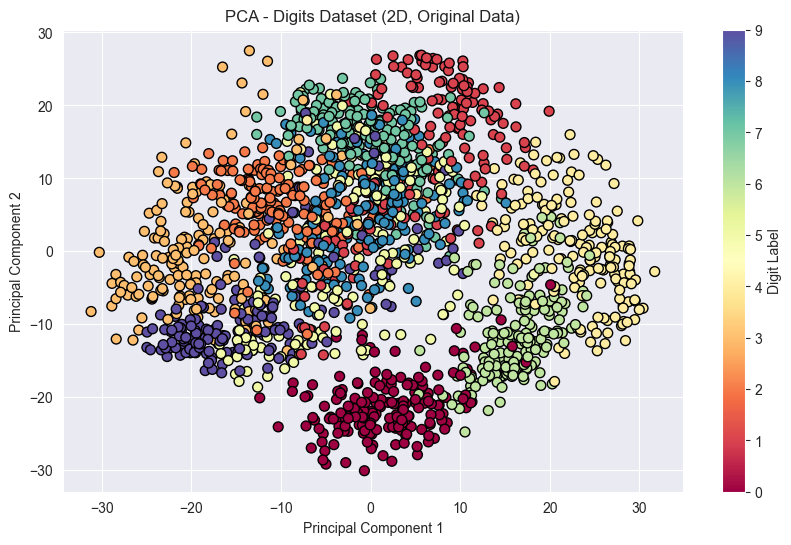

Składowe główne (macierz wektorów własnych):
[[ 0.00000000e+00 -1.73094651e-02 -2.23428835e-01 -1.35913304e-01
  -3.30323092e-02 -9.66340844e-02 -8.32943805e-03  2.26900082e-03
  -3.20516495e-04 -1.19308905e-01 -2.44451676e-01  1.48512745e-01
  -4.67319410e-02 -2.17740744e-01 -1.48136776e-02  4.47779518e-03
  -4.94136398e-05 -7.95419375e-02  8.33951454e-02  2.15915342e-01
  -1.72126801e-01 -1.63712098e-01  2.86444452e-02  4.23251803e-03
   9.85488574e-05  6.42319144e-02  2.54093316e-01 -3.56771026e-02
  -2.09462569e-01 -4.31311420e-02  5.13118688e-02  2.13422732e-04
   0.00000000e+00  1.59950883e-01  3.68690774e-01  1.64406827e-01
   8.52007908e-02  3.72982855e-02  2.15866980e-02  0.00000000e+00
   1.28865585e-03  1.06945287e-01  3.03067457e-01  2.47813041e-01
   2.09637296e-01  1.22325219e-02 -3.69458497e-02  1.61485028e-03
   6.93023548e-04 -8.35144239e-03 -5.58598986e-02  9.30534169e-02
   1.07387720e-01 -1.37734565e-01 -6.32879466e-02  9.61671077e-04
   9.55079131e-06 -1.40786840e-

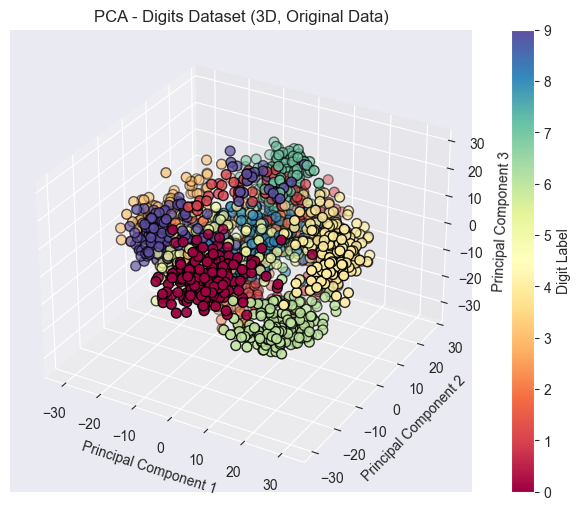

Wariancja wyjaśniana przez PC1: 0.15
Wariancja wyjaśniana przez PC2: 0.14
Wariancja wyjaśniana przez PC3: 0.12
Łączna wariancja wyjaśniana przez trzy składowe: 0.40


In [3]:

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits

digits = load_digits()
X = digits.data
y = digits.target

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='Spectral', edgecolor='k', s=50)
plt.title("PCA - Digits Dataset (2D, Original Data)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(scatter, label="Digit Label")
plt.show()

print("Składowe główne (macierz wektorów własnych):")
print(pca.components_)

explained_variance = pca.explained_variance_ratio_
print(f"Wariancja wyjaśniana przez PC1: {explained_variance[0]:.2f}")
print(f"Wariancja wyjaśniana przez PC2: {explained_variance[1]:.2f}")
print(f"Łączna wariancja wyjaśniana przez dwie składowe: {explained_variance.sum():.2f}")

pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=y, cmap='Spectral', edgecolor='k', s=50)
ax.set_title("PCA - Digits Dataset (3D, Original Data)")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
fig.colorbar(scatter, ax=ax, label="Digit Label")
plt.show()

explained_variance_3d = pca_3d.explained_variance_ratio_
print(f"Wariancja wyjaśniana przez PC1: {explained_variance_3d[0]:.2f}")
print(f"Wariancja wyjaśniana przez PC2: {explained_variance_3d[1]:.2f}")
print(f"Wariancja wyjaśniana przez PC3: {explained_variance_3d[2]:.2f}")
print(f"Łączna wariancja wyjaśniana przez trzy składowe: {explained_variance_3d.sum():.2f}")
